# 变量存储机制

> Python中的变量存储机制以及数据类型可变性

在变量是编程语言里重要的基本概念，在各类高级语言里都用变量来代表一块内存区域，某一时刻这块区域里存储了‘a’，又一时刻可能又被存储成了'c'， 正是由于该块内存里的值可以随时发生变化，我们称之这个代表内存区域的符号为变量。

想象一下你有一个超级神奇的衣柜（内存空间）。这个衣柜很特别，不是用来放衣服的，而是用来存放各种各样的"值"。让我们来看看这个衣柜是怎么工作的：

*变量名就像衣柜的标签* 🏷️

In [1]:
a = 12

这里的`a`就像是在衣柜上贴了一个标签，告诉你"这格柜子里放着数字12"

In [2]:
print(a)

12


我们打印看看`a`的值，在这里Python在内存中创建了一个数12，并用a指向了它。

In [3]:
b = "Hello world"

In [4]:
print(b)

Hello world


字符串也是一样的道理。此时Python在内存中创建了一个字符串"Hello world", 并用b指向了它。

我们一起来看一个有趣的现象🎭

In [5]:
x = 300
y = 300
print(x is y)

False


In [6]:
small_x = 5
small_y = 5
print(small_x is small_y)

True


咦？这是为什么呢？因为 Python 有个小机灵鬼行为：对于范围在-5到256之间的整数，Python 会提前在衣柜里准备好这些常用的数字，所以相同的小数字会指向同一个柜格！

这就像是在衣柜里新开了一格，把原来的东西完完整整地复制了一份~

In [7]:
print(f'a的id是{id(a)}')

a的id是4341495248


In [8]:
print(f'b的id是{id(b)}')

b的id是4392323760


`id()`函数就像是查看衣柜格子的编号，让你知道变量到底指向哪里, 才找到每个对象所在的内存位置。

In [9]:
?id

Signature: id(obj, /)
Docstring:
Return the identity of an object.

This is guaranteed to be unique among simultaneously existing objects.
(CPython uses the object's memory address.)
Type:      builtin_function_or_method

In [10]:
a = 13
print(f"a的id是{id(a)}")

a的id是4341495280


In [11]:
# 我们可以看看当执行a = b会发生什么
a = b
print(f'a的值是{a}, a的id值是{id(a)}')
print(f'b的值是{b}, b的id值是{id(b)}')

a的值是Hello world, a的id值是4392323760
b的值是Hello world, b的id值是4392323760


当执行`a=b`以后，`a`和`b`指向同一个地址。如图
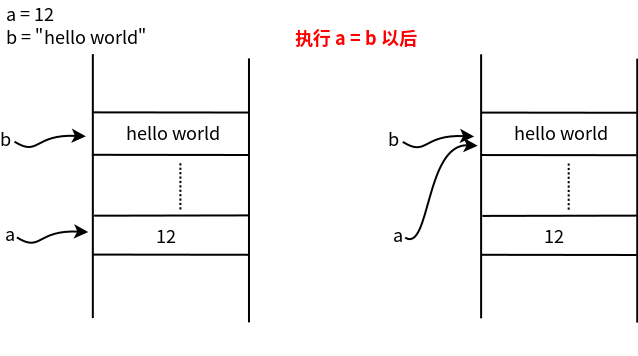

### 不可变数据类型
在Python中，不可变数据类型是指一旦创建就不能被修改的对象。让我们继续上面的例子重新给`a`赋值。

In [12]:
a = 10
print(f'a的值是{a}, a的id值是{id(a)}')
print(f'b的值是{b}, b的id值是{id(b)}')

a的值是10, a的id值是4341495184
b的值是Hello world, b的id值是4392323760


当执行完`a=10`以后, Python在内存中创建了一个整数10，并用a指向了它。b的值还有内存地址都不变。

In [13]:
b = "Python is fun"
print(f'b的值是{b}, b的id值是{id(b)}')

b的值是Python is fun, b的id值是4392519344


### 可变数据类型
我们来看如果修改可变数据类型，会发生什么。

In [14]:
list1 = [1, 2, 3]
list2 = list1

print(f"list1: {list1}, list1的id: {id(list1)}")
print(f"list2: {list2}, list2的id: {id(list2)}")

list1: [1, 2, 3], list1的id: 4392518592
list2: [1, 2, 3], list2的id: 4392518592



* 创建列表 list1 = [1, 2, 3] 时,Python在内存中创建了这个列表对象。
* list2 = list1 使list2指向同一个列表对象。
* 当我们修改list1时(如append),实际上是修改了它指向的对象。因为list2指向同一个对象,所以list2也会看到这个变化。

In [15]:
list1.append(4)
print(f"修改后list1: {list1}, list1的id: {id(list1)}")
print(f"list2: {list2}, list2的id: {id(list2)}")

修改后list1: [1, 2, 3, 4], list1的id: 4392518592
list2: [1, 2, 3, 4], list2的id: 4392518592


想要真正复制一个列表？🔄

In [16]:
original = [1, 2, 3]
copy = original.copy()

In [17]:
def modify_list(lst):
    lst.append(5)

modify_list(list1)
print(f"函数调用后list1: {list1}")
print(f"函数调用后list2: {list2}")

函数调用后list1: [1, 2, 3, 4, 5]
函数调用后list2: [1, 2, 3, 4, 5]


* 在Python中,函数参数是通过引用传递的。
* 当我们将list1传给函数modify_list时,函数内的lst参数指向与list1相同的对象。
* 因此,函数内对lst的修改会影响到list1和list2。

In [18]:
def create_object():
    temp = "这是一个临时对象"
    print(f"临时对象的id: {id(temp)}")

create_object()

临时对象的id: 4392718128


* 在函数create_object中,我们创建了一个临时字符串对象。
* 当函数结束后,这个对象不再被任何变量引用,Python的垃圾回收机制会在适当的时候将其删除,释放内存。

**课后练习** 除了列表以外，还有其他可变数据类型？他们是否遵循上面可变数据类型的性质？